In [144]:
import quandl
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
import numpy as np
from functools import reduce

sns.set(style = 'darkgrid', context = 'talk', palette = 'Dark2')
%matplotlib inline

my_year_month_fmt = mdates.DateFormatter('%m/%y')

In [145]:
start = "2015-01-01"
end =  "2019-12-31"

df = quandl.get("WIKI/TSLA", start_date = start, end_date = end).Close
df2 = quandl.get("WIKI/JNJ", start_date = start, end_date = end).Close
df3 = quandl.get("WIKI/AAPL", start_date = start, end_date = end).Close

df = pd.merge(df, df2, left_index = True, right_index = True)
df = pd.merge(df, df3, left_index = True, right_index = True)

df.columns = ['TSLA', 'JNJ', 'AAPL']

In [138]:
short_rolling = df.rolling(window = 20).mean()
long_rolling = df.rolling(window = 100).mean()

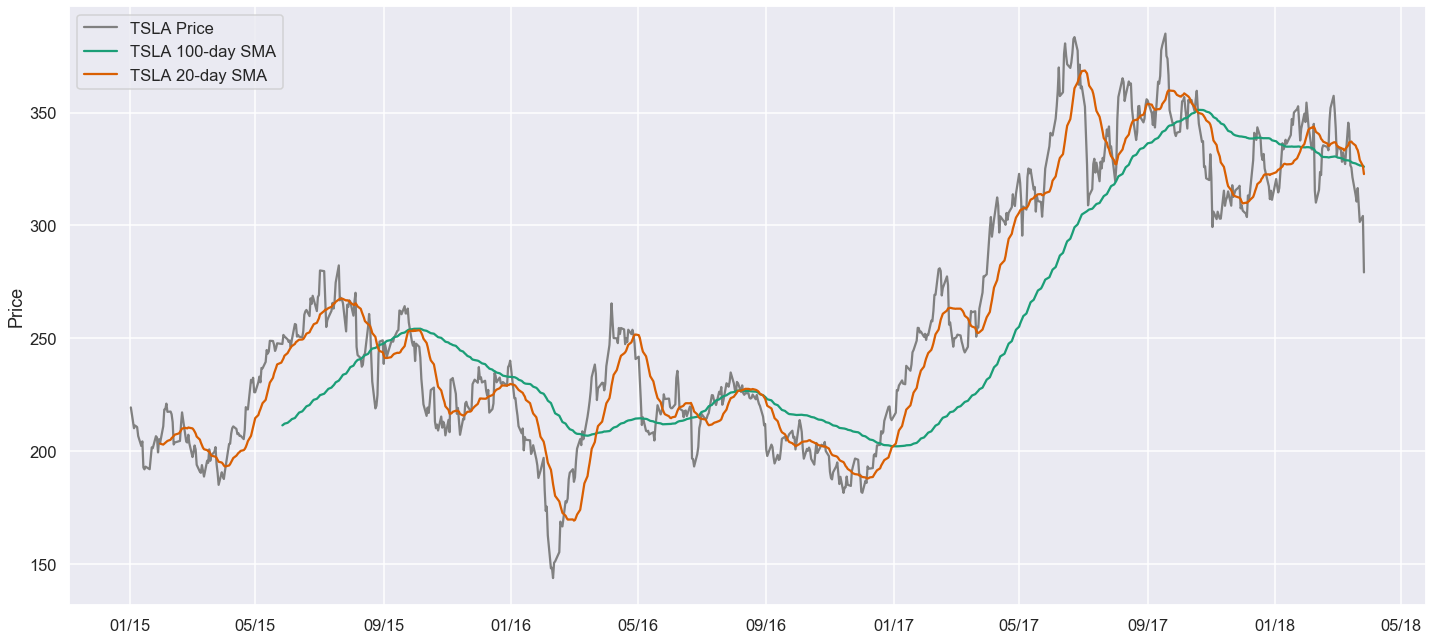

In [149]:
fig,ax = plt.subplots(figsize = (20,9))

ax.plot(df['TSLA'], label = 'TSLA Price', c = 'gray')
ax.plot(long_rolling['TSLA'], label = 'TSLA 100-day SMA')
ax.plot(short_rolling['TSLA'], label = 'TSLA 20-day SMA')

ax.legend(loc = 'upper left')
ax.set_ylabel('Price')
ax.xaxis.set_major_formatter(my_year_month_fmt)

plt.tight_layout()

# Exponential Moving Average (No Pos. Size Provision)

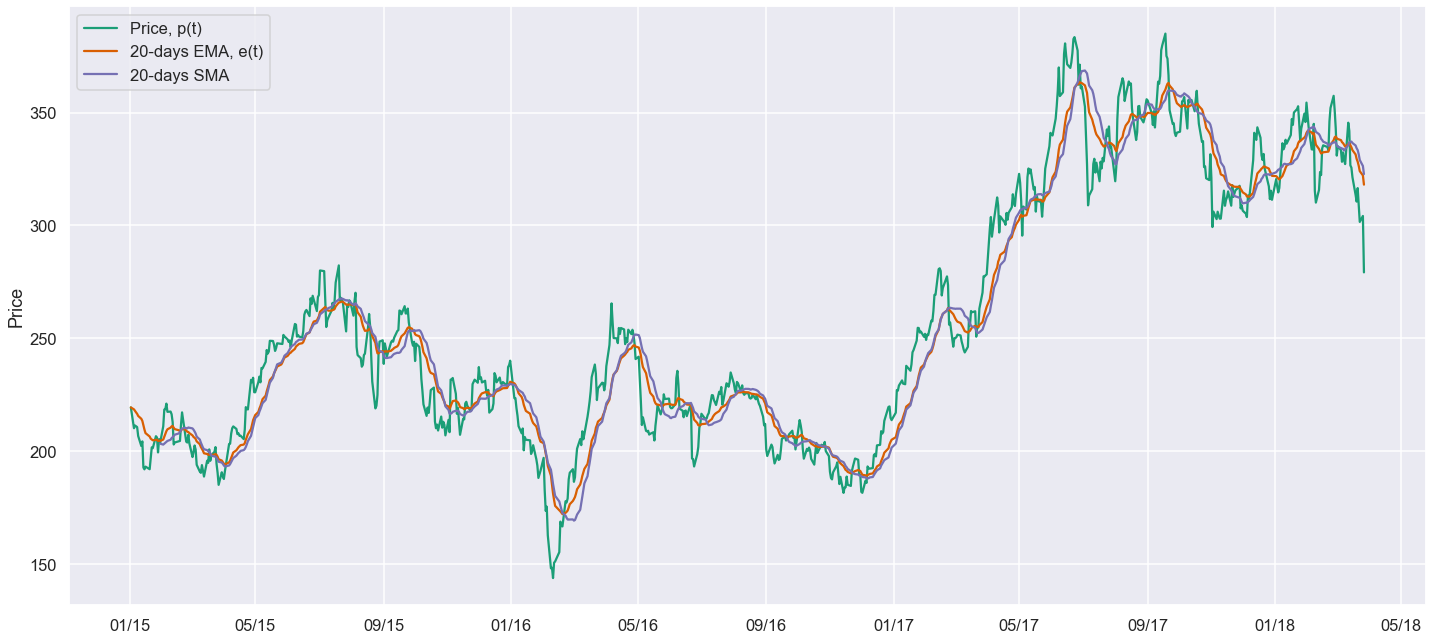

In [150]:
ema_short = df.ewm(span = 20, adjust = False).mean()

fig, ax = plt.subplots(figsize = (20,9))
ax.plot(df.TSLA, label = 'Price, p(t)')
ax.plot(ema_short.TSLA, label = '20-days EMA, e(t)')
ax.plot(short_rolling.TSLA, label = '20-days SMA')

ax.legend(loc = 'upper left')
ax.set_ylabel('Price')
ax.xaxis.set_major_formatter(my_year_month_fmt)

plt.tight_layout()

* When the price timeseries p(t) crosses the EMA timeseries e(t) from below, we will close any existing short position and go long (buy) one unit of the asset.
     - pi(t)>ei(t) , then wi(t)= 1/3
* When the price timeseries p(t) crosses the EMA timeseries e(t) from above, we will close any existing long position and go short (sell) one unit of the asset.
     -  pi(t)<ei(t), then wi(t)= -1/3

In [153]:
trade_pos_raw = df - ema_short
trade_pos_raw.tail()

,TSLA,JNJ,AAPL
Date,,,
2018-03-21,-11.711853,-0.686201,-4.266867
2018-03-22,-17.318819,-4.067992,-6.054547
2018-03-23,-22.509408,-5.743421,-9.011018
2018-03-26,-17.977083,-3.124524,-1.068540
2018-03-27,-38.884028,-2.989807,-4.974870


In [154]:
trade_positions = trade_pos_raw.apply(np.sign) * 1/3
trade_positions.tail()

,TSLA,JNJ,AAPL
Date,,,
2018-03-21,-0.333333,-0.333333,-0.333333
2018-03-22,-0.333333,-0.333333,-0.333333
2018-03-23,-0.333333,-0.333333,-0.333333
2018-03-26,-0.333333,-0.333333,-0.333333
2018-03-27,-0.333333,-0.333333,-0.333333
